In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Country Clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


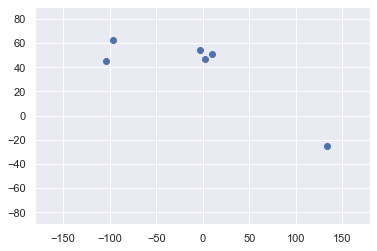

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])

plt.xlim(-180,180)

plt.ylim(-90,90)

plt.show()

## Select the features

In [5]:
#x = data.iloc[:,1:3]

x = data.drop(['Country', 'Language'], axis = 1)

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [7]:
kmeans = KMeans(3)

kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

In [8]:
identified_clusters = kmeans.fit_predict(x)

# `fit_predict` Compute cluster centers and predict cluster index for each sample.

identified_clusters

array([2, 2, 0, 0, 0, 1])

In [9]:
data_with_clusters = data.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


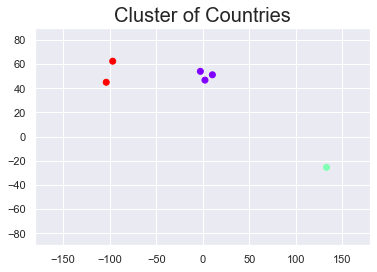

In [10]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],
            c=data_with_clusters['Cluster'],cmap='rainbow')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.title("Cluster of Countries", size = 20)

plt.show()

# Clustering the categorical data

In [11]:
data_mapped = data.copy()
 
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})

data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Feature selection

In [12]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [22]:
kmeans = KMeans(3)

kmeans.fit(x)

KMeans(n_clusters=3)

## Results

In [23]:
identified_clusters = kmeans.fit_predict(x)

identified_clusters

array([2, 2, 0, 0, 0, 1])

In [24]:
data_with_clusters = data_mapped.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


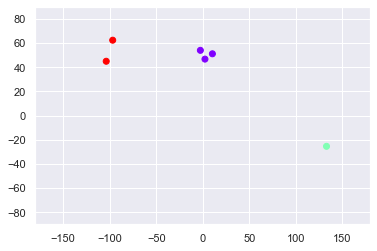

In [25]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Number of clusters

### `WCSS (within-cluster sum of squares)`

WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.

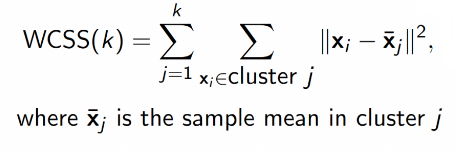

In [26]:
# Here, `inertia_` calculate the WCSS with four clusters
kmeans.inertia_

290.10523333333333

In [21]:
wcss=[]


for i in range(1,7):

    kmeans = KMeans(i)
 
    kmeans.fit(x)
    
    wcss_iter = kmeans.inertia_
  
    wcss.append(wcss_iter)


wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'WCSS')

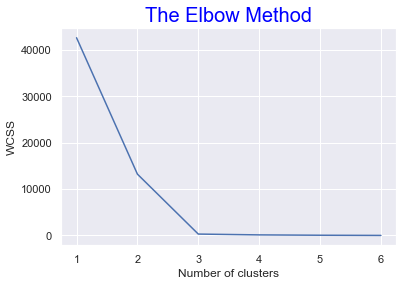

In [19]:
number_clusters = range(1,7)

plt.plot(number_clusters,wcss)

plt.title('The Elbow Method', size = 20, color = 'blue')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')